In [1]:
# TODO: are min and max gate voltages fine at -10 and 10?
# TODO: what is diff of srs 830 vs 810? figure out which to get the phase from
# TODO: how many steps and what delay time for keithley?
# TODO: how to set whether srs is measuring current or voltage
# TODO: will get delay from cameron--prob like 3 seconds.  then determine number of voltage steps.

# %run lockin_iv.ipynb
%run lockin_iv_keithley2.ipynb
%run lockin_iv_ami.ipynb
%run k2400.ipynb
%run ami420.ipynb
%run srs.ipynb
%run fileio.ipynb
%run hp603.ipynb
%run hp344.ipynb

SyntaxError: invalid syntax (108531801.py, line 12)

SyntaxError: invalid syntax (108531801.py, line 12)

In [22]:
# ami420=initami('GPIB1::22::INSTR') # init ami on GPIB addr 22
srxx=initsrs('GPIB1::7::INSTR') # init srs on GPIB addr 8
srxy=initsrs('GPIB1::8::INSTR') # init srs on GPIB addr 20
srcurrent=initsrs('GPIB1::9::INSTR') # init srs on GPIB addr 20
k2400=init2400('GPIB0::3::INSTR') # init k2400 on GPIB addr 3
# ami = initami('GPIB0::22::INSTR')
# hp = inithp('GPIB0::21::INSTR')
# hp2 = inithp2('GPIB0::21::INSTR')

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1199539,C30   Mar 17 2006 09:29:29/A02  /K/J



In [3]:
np.linspace(0,1,51)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

1


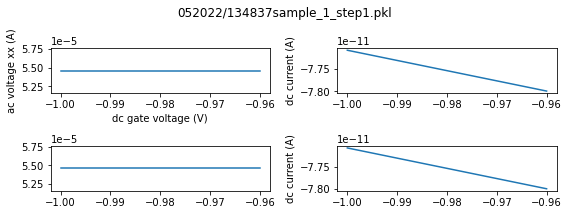

In [23]:
# Sweep gate voltage (from Vmin = -10 V to Vmax = 10 V) and record Rxx, Rxy. Stay at Vg=Vmax. (See Fig 3a from Dean2010). Ramp speed: 0.02 V/sec
step1 = lockin_iv_keithley(k2400,srxx,srxy,srcurrent,np.linspace(-10,10,333),3,1) #how many steps, what delay time

In [ ]:

# # While Vg=Vmax, sweep the magnetic field from Bmin = 0 T to Bmax = 5 T. We should see a typical QHE plot for Rxx, Rxy. 
# ACTUAL RAMP RATE: 0.032

# step2 = lockin_iv_ami(ami,srxx,srxy,srcurrent,0,1,,0.5,2)

ami.write('CONF:COIL 1')
ami.write('CONF:STAB 98')
step2 = lockin_iv_ami(ami,srxx,srxy,srcurrent,0.5,0,0.1,1,2)

In [ ]:

# # Go from V = Vmax to V = Vmin while staying at B = Bmax. We expect to see steps in Rxy that correspond to crossing of n=1,0,-1 LLs
# step3 = lockin_iv_keithley(k2400,srxx,srxy,srcurrent,np.linspace(10,-10,steps,delay,3)) #how many steps, what delay time
          

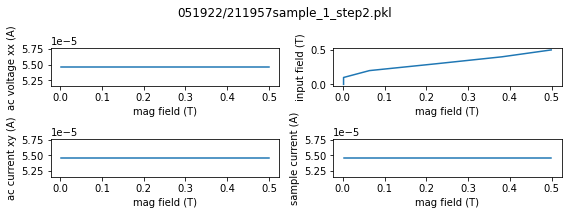

In [57]:
                                                             
# # Sweep from B = Bmax to B = 0 while at V = Vmin. We expect to see Rxy(-B) = -Rxy(B), Rxx(-B)=Rxx(B) according to Onsager relations.                                                                 
# step4 = lockin_iv_ami(ami420,srsxx,srsxy,srscurrent,5,0,0.032, delay, 4)



1


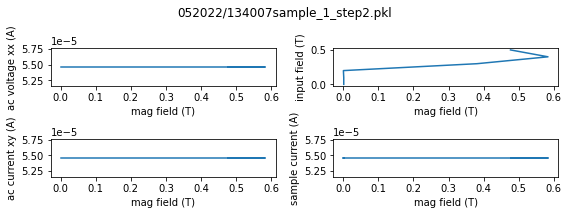

In [6]:
step2 = lockin_iv_ami(ami,srxx,srxy,srcurrent,0,0.5,0.1,1,2)

In [65]:
ami.write('CONF:STAB 98')

14